### import dependies

In [102]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

### create random dataset

In [103]:


# Create an empty list to hold the database entries
database = []

# Generate 100 random entries
for i in range(1000):
    # Generate a random weight and size for the fruit
    weight = random.randint(50, 200)  # in grams
    size = random.uniform(5, 10)  # in centimeters
    
    # Choose a random fruit type
    fruit_type = random.choice(['apple', 'orange'])
    
    # Add the entry to the database list
    database.append({'weight': weight, 'size': size, 'class': fruit_type})
df=pd.DataFrame(database)
df

,weight,size,class
0,183,7.375232,orange
1,106,8.295976,apple
2,181,6.898537,orange
3,144,8.680477,apple
4,140,8.025476,apple
...,...,...,...
995,140,5.695530,apple
996,127,9.073746,apple
997,125,8.424567,orange
998,93,8.955786,apple


### load  logical database

In [104]:
cell_df=pd.read_csv(r"apples_and_oranges.csv")
cell_df



,weight,size,class
0,58,4.47,orange
1,64,5.22,apple
2,54,4.48,orange
3,59,4.66,orange
4,65,5.25,apple
5,57,4.18,orange
6,64,5.50,apple
7,55,4.13,orange
8,60,4.83,orange
9,59,4.61,orange


In [105]:
cell_df["class"].describe()

count         39
unique         2
top       orange
freq          20
Name: class, dtype: object

plot with random data

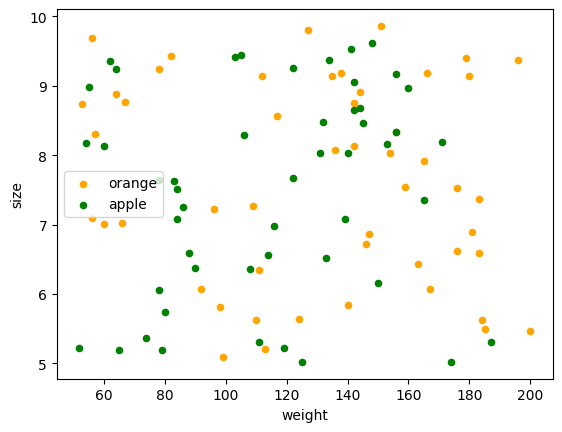

In [106]:
ax = df[df['class'] == "orange"][0:50].plot(kind='scatter', x='weight', y='size', color='orange', label='orange')
df[df['class'] == "apple"][0:50].plot(kind='scatter', x='weight', y='size', color='green', label='apple', ax=ax)

plt.show()

logical_suitable_data

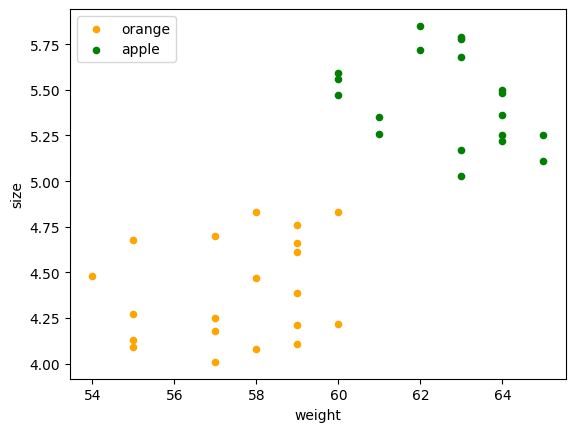

In [107]:
ax = cell_df[cell_df['class'] == "orange"][0:50].plot(kind='scatter', x='weight', y='size', color='orange', label='orange')
cell_df[cell_df['class'] == "apple"][0:50].plot(kind='scatter', x='weight', y='size', color='green', label='apple', ax=ax)

plt.show()

### split  train and  test data

run with logical databse

In [108]:
x_data=cell_df[["size","weight"]]
x_data=np.asanyarray(x_data)
y_data=cell_df[["class"]]
y_data=np.asanyarray(y_data)

In [109]:
X_train, X_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (31, 2) (31, 1)
Test set: (8, 2) (8, 1)


### create model svm

In [110]:
my_models=['sigmoid', 'rbf', 'poly', 'linear']

#### Evaluation every models_find best model

In [111]:
from sklearn import svm
from sklearn.metrics import jaccard_score

my_scores_model={}

#  all models with  jaccard_score
 
for model in my_models:
    clf = svm.SVC(kernel=model)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    score=jaccard_score(y_test, yhat,pos_label="orange")
    my_scores_model[model]=score

best_model=""
for key,value in my_scores_model.items():
    if value==max(my_scores_model.values()):
        best_model=key
 
       
print(best_model)


linear


c:\Users\ols\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ols\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ols\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ols\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversio

In [112]:
clf = svm.SVC(kernel=best_model)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

c:\Users\ols\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [114]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         5
      orange       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Confusion matrix, without normalization
[[3 0]
 [0 5]]


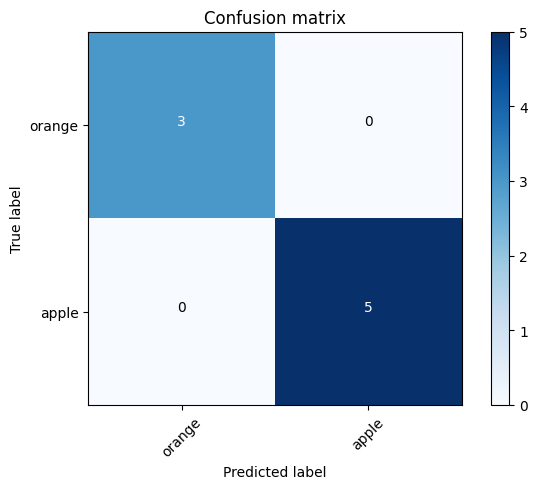

In [115]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=["orange","apple"])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['orange','apple'],normalize= False,  title='Confusion matrix')